In [1]:
%run ../algorithmeX.ipynb

## Puzzles de pentominos

In [2]:
class PIECE:

    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = piece
        self.couleur = couleur
        self.largeur = len(self.piece[0])
        self.hauteur = len(self.piece)

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def transposee(self):
        q = self.piece
        return PIECE(self.nom, 
                     tuple(tuple(q[j][i] for j in range(self.hauteur)) 
                                  for i in range(self.largeur)))

    def rotation(self):
        q = self.piece
        return PIECE(self.nom, 
                     tuple(tuple(q[self.hauteur - j - 1][i] for j in range(self.hauteur)) 
                                  for i in range(self.largeur)))
                    
    def isometriques(self):
        p1 = self.rotation()
        p2 = p1.rotation()
        p3 = p2.rotation()
        q0 = self.transposee()
        q1 = q0.rotation()
        q2 = q1.rotation()
        q3 = q2.rotation()
        return list({self,p1,p2,p3,q0,q1,q2,q3})
 
    def polygoneOfCouples(e):
        """e est un ensemble de couples d'entiers (i,j)
        representant une piece (un polyomino).
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        segments = set()
        for i,j in e:
            if (i + 1, j) not in e: segments.add(((i+1,j),(i+1,j+1)))
            if (i, j + 1) not in e: segments.add(((i+1,j+1),(i,j+1))) 
            if (i - 1, j) not in e: segments.add(((i,j+1),(i,j)))
            if (i, j - 1) not in e: segments.add(((i,j),(i+1,j))) 
        (i,j),(k,l) = segments.pop()
        l = [(i,j),(k,l)]
        while True:
            try:
                l.append({s[1] for s in segments if s[0] == l[-1]}.pop())
            except KeyError: break        
        return list(zip(*l))

    def polygone(self, transformation = None):
        """Renvoie une liste de deux tuples pour le dessin de self.
        Si transformation != None,  c'est une liste de listes representant 
        une matrices (2,2) qui est appliquee au polygone.
        """

        e = {(i,j) for i in range(self.largeur)
                   for j in range(self.hauteur)
                   if self.piece[i][j]}
        p = PIECE.polygoneOfCouples(e)
        if transformation:
            [[a,b],[c,d]] = transformation
            f = lambda z: (a * z[0] + b * z[1], c * z[0] + d * z[1])
            return list(zip(*map(f,zip(*p))))
        else:
            return p

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (couples d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                   ligne = [p.nom] if self.strict else []
                   match = True
                   for i in range(p.largeur):
                       if match:
                           ic = i + u 
                           for j in range(p.hauteur):
                               jc = j + v
                               if p.piece[j][i] == 1:
                                   if conditions(ic,jc):
                                       ligne.append((ic,jc))
                                   else:
                                       match = False
                                       break
                       else:
                           break  
                   if match:
                       lignes[nbLignes] = ligne
                       nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):
        """Pour afficher plusieurs solutions :
        executer un script ou utiliser jupyter
        """
        import matplotlib
        import matplotlib.pyplot as plt
        if not self.strict: from random import random
        matplotlib.rcParams['toolbar'] = 'None'
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.axis([self.min_i - 1, self.max_i + 1,
                 self.min_j - 1, self.max_j + 1])
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = (random(),random(),random())                               
            ax.fill(*PIECE.polygoneOfCouples(e),
                      facecolor = couleur,
                      edgecolor='black', 
                      linewidth=1)
        #fig.show() # commenter si notebook


#------------------------------- PENTOMINOS ----------------------------

F = PIECE( 'F',((0,1,1),
                (1,1,0),
                (0,1,0)), couleur = 'yellow')
I = PIECE('I',((1,),
               (1,),
               (1,),
               (1,),
               (1,)), couleur = 'plum')
L = PIECE('L',((1,0),
               (1,0),
               (1,0),
               (1,1)), couleur = 'orangered')
N = PIECE('N',((0,1),
               (0,1),
               (1,1),
               (1,0)), couleur = 'dimgray')
P = PIECE('P',((1,1),
               (1,1),
               (1,0)), couleur = 'royalblue')
T = PIECE('T',((1,1,1),
               (0,1,0),
               (0,1,0)), couleur = 'green')
U = PIECE('U',((1,0,1),
               (1,1,1)), couleur = 'yellow')
V = PIECE('V',((0,0,1),
               (0,0,1),
               (1,1,1)), couleur = 'darkblue')
W = PIECE('W',((0,0,1),
               (0,1,1),
               (1,1,0)), couleur = 'purple')
X = PIECE('X',((0,1,0),
               (1,1,1),
               (0,1,0)), couleur = 'red')
Y = PIECE('Y',((0,1),
               (1,1),
               (0,1),
               (0,1)), couleur = 'darkred')
Z = PIECE('Z',((1,1,0),
               (0,1,0),
               (0,1,1)), couleur = 'grey')
        

### Test

['L', (1, 2), (1, 3), (1, 4), (1, 5), (2, 5)]
['T', (1, 1), (2, 1), (2, 2), (2, 3), (3, 1)]
['Y', (2, 4), (3, 2), (3, 3), (3, 4), (3, 5)]


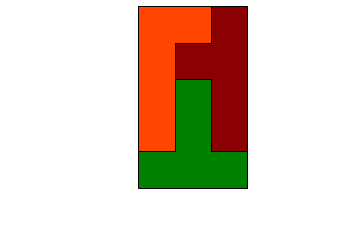

In [3]:
puzzle = PUZZLE([L] + T.isometriques() + Y.isometriques(),1,3,1,5)
for sol in puzzle.solve():
    puzzle.plotSolution(sol)
    puzzle.printSolution(sol)

### Exemple 1

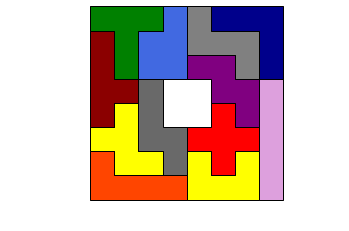

In [4]:
# 65 solutions

pentominos = [F]
for p in [I,L,N,P,T,U,V,W,X,Y,Z]: pentominos += p.isometriques()

puzzle = PUZZLE(pentominos,1,8,1,8,
                conditions = (lambda i,j: not (4 <= i <= 5 and 4 <= j <= 5)))
    
s = puzzle.solve()
        
sol = next(s)
puzzle.plotSolution(sol)
#puzzle.printSolution(sol)


### Exemple 2

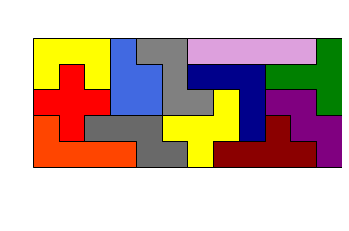

In [5]:
# 1010 solutions

#from puzzle import * # commenter si notebook

pentominos = [F,F.rotation()]
for p in [I,L,N,P,T,U,V,W,X,Y,Z]: pentominos += p.isometriques()

puzzle = PUZZLE(pentominos,1,12,1,5)
    
s = puzzle.solve()
        
sol = next(s)
puzzle.plotSolution(sol)
#puzzle.printSolution(sol)


### Exemple 3

In [13]:
def unePiece(piece):
    puzzle = PUZZLE(piece.isometriques(),1,15,1,15,strict = False)    
    s = puzzle.solve()
    sol = next(s)
    puzzle.plotSolution(sol)

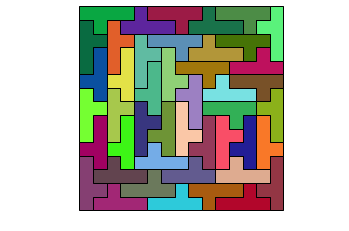

In [14]:
# 8 x 212 = 1696 solutions
unePiece(Y)